In [1]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from dataset.raw_data import private_train_data
from dataset import PrivateDataset
from hydra import initialize, compose
import matplotlib.pyplot as plt

/home/hoang/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hoang/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/hoang/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
data = private_train_data("/home/hoang/Documents/CodeSpace/air-quality-forecasting/data-private/data-train-org")

In [3]:
locs = []
for station in data["air"].values():
    locs.append(station["loc"])

locs = torch.tensor(locs)
locs.shape

torch.Size([71, 2])

In [4]:
locs.mean(0), locs.std(0)

(tensor([105.7804,  21.0309]), tensor([0.1088, 0.0793]))

In [5]:
from utils.functional import extract_wind
temp = []

for station in data["meteo"].values():
    # temp = temp.append(station["data"]["surface_pressure"], ignore_index=True)
    dt = station["data"]
    _, winspeed = extract_wind(dt["u10"].tolist(), dt["v10"].tolist())

    temp.extend(winspeed)

In [6]:
temp = torch.tensor(temp)
temp.mean(), temp.std()

(tensor(2.3317), tensor(1.9003))

In [7]:
data["air"].keys()

dict_keys(['S0000457-Nguyen Che Nghia', 'S0000210-Truong THCS Yen So', 'S0000349-Ecohome Phuc Loi', 'S0000370-Ba Trieu', 'S0000588-Truong THCS Ngo Si Lien', 'S0000399-Truong Mam non Thuc hanh Hoa Sen', 'S0000531- Minh Tri', 'S0000347- Gamuda Gardens ', 'S0000509-Van Phu', 'S0000403-Truong THCS PASCAL', 'S0000148-TT doi moi CN - CNC Hoa Lac', 'S0000551-Truong Mam non Viet - Bun', 'S0000169-Ngoc Thuy', 'S0000289- Nhan Chinh', 'S0000319-Bat Trang', 'S0000328-Luong The Vinh', 'S0000497-Chuyen My', 'S0000331-Truong THCS Le Quy Don', 'S0000157-Truong Mam non GCA Ecolife Capitol', 'S0000611-Nguyen Ngoc Vu', 'S0000621-Truong Pho Thong Lien Cap Sinh Thai EraSchool', 'S0000336-Truong THCS Nguyen Trai', 'S0000554-Truong Mam Non Thuc hanh Hoa Hong', 'S0000137-Ngoc Khanh', 'S0000630-Truong Tieu hoc Thi tran Soc Son', 'S0000310-Hang Trong', 'S0000475-Chung cu A1 - KDT Ha Dinh', 'S0000547-Phu Dong', 'S0000624-Cong ty co phan cong nghe MobiFone toan cau', 'S0000136-Linh Dam', 'S0000504-Le Trong Tan', 

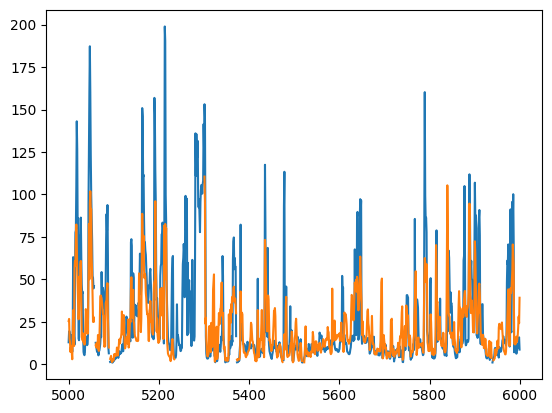

In [11]:
plt.plot(data["air"]["S0000457-Nguyen Che Nghia"]["data"]["PM2.5"][5000:])
plt.plot(data["air"]['S0000171-GENESIS School']["data"]["PM2.5"][5000:])

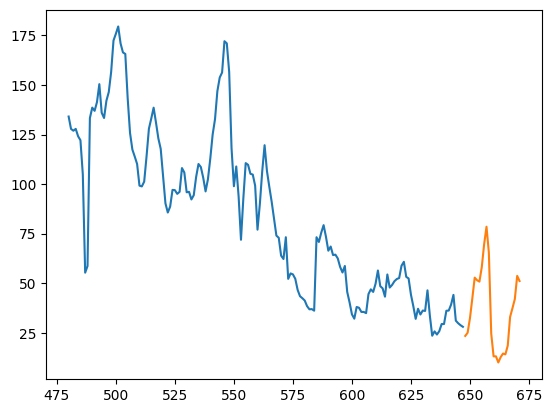

In [8]:
i = 20
s1 = i * 24
e1 = s1 + 168
s2 = e1
e2 = s2 + 24

plt.plot(data["air"]["S0000457-Nguyen Che Nghia"]["data"]["PM2.5"].iloc[s1 : e1])
plt.plot(data["air"]["S0000457-Nguyen Che Nghia"]["data"]["PM2.5"].iloc[s2 : e2])

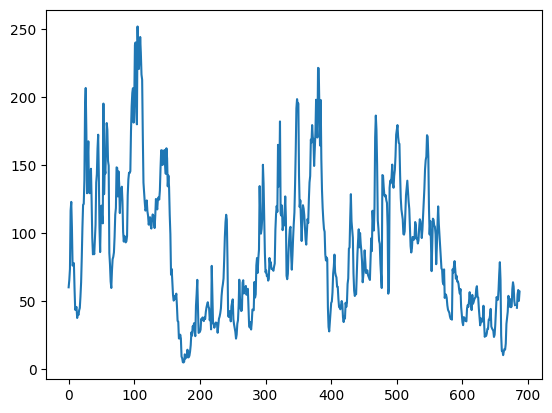

In [9]:
plt.plot(data["air"]["S0000457-Nguyen Che Nghia"]["data"]["PM2.5"][0 : 30 * 24])